In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

data_path = os.getcwd() + '/dados' # precisa limpar o cabecalho desses arquivos

from ES3 import * 
os.listdir(data_path)[2]

'SIMCOSTA_RJ-4_OCEAN_2017-08-28_2022-01-25.csv'

In [4]:
dado = trata_dado(data_path + '/' + os.listdir(data_path)[2])

In [5]:
teste_serie_temporal(dado)

Foram encontradas 3 falhas na serie temporal.


[(Timestamp('2019-12-31 23:25:00'), Timestamp('2020-01-10 00:25:00')),
 (Timestamp('2020-09-14 07:55:00'), Timestamp('2020-10-29 14:25:00')),
 (Timestamp('2020-12-21 15:55:00'), Timestamp('2021-05-05 11:51:40'))]

In [6]:
evento_extremo(dado)

In [7]:
aproveitamento(dado, 'Hsig')

De 53906 valores, 171 foram marcados com a flag de pulo (0.32%).
4 valores foram marcados com a flag de crise (0.01%).


Text(0.5, 1.0, 'Dados suspeitos marcados')

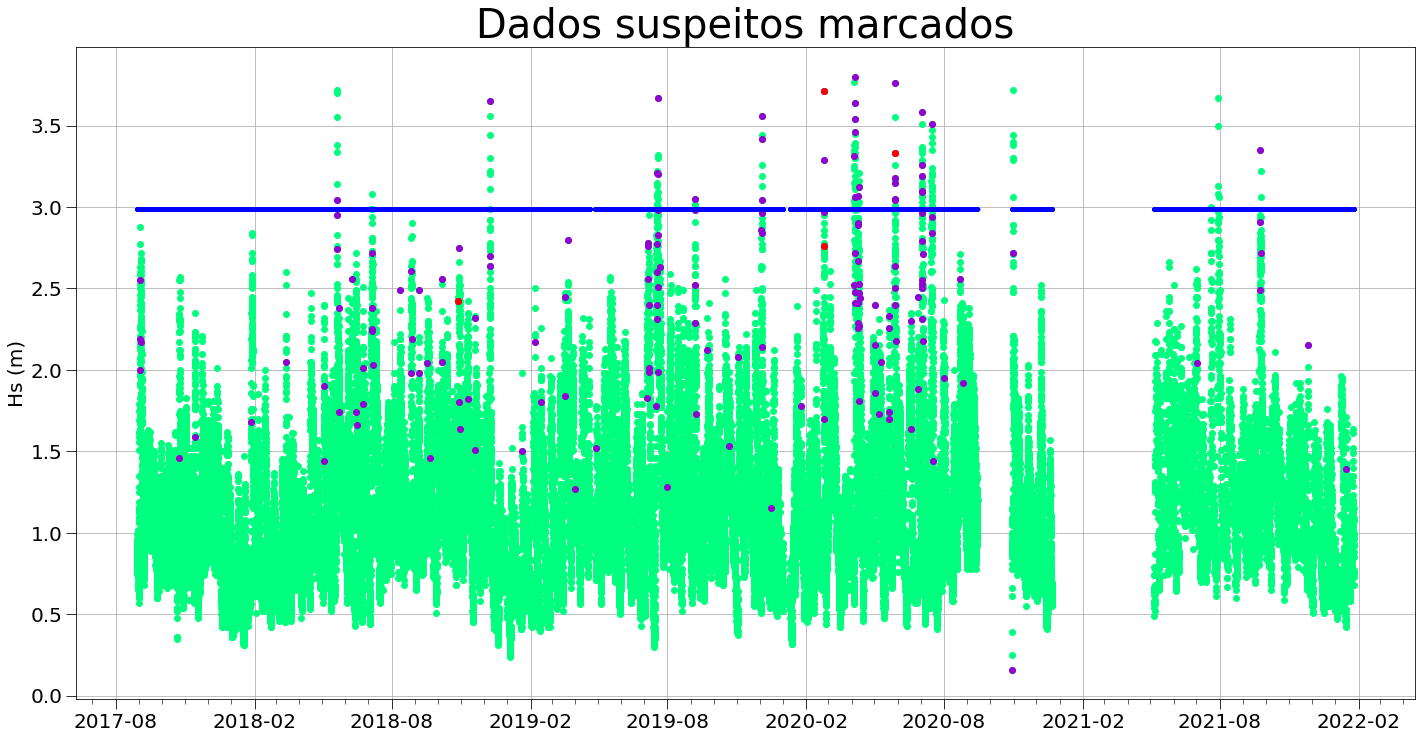

In [8]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dado['Hsig'][:], marker = 'o', color = 'springgreen', linestyle = 'none')
ax.plot(dado['jump_flag'][:], marker = 'o', color = 'darkviolet', linestyle = 'none')
ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')
# ax.plot(serie4['Hsig'][:], marker = 'o', color = 'purple', linestyle = 'none')


ax.plot(dado['EE_Hsig'][:], marker = '.', color = 'blue', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

# ax.set_ylim(0,5)
# ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('Dados suspeitos marcados', fontsize = 40)